In [24]:
import requests
import bs4
import os
import webbrowser
import pyperclip
import re
import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
movie_name = []
imdb_rating = []
meta_rating = []
votes = []
runtime=[]
tl_gross=[]

for j in range(10,16):
    for i in range(0,2):
        try:
            res = requests.get(
            "https://www.imdb.com/search/title?release_date=20"+str(j)+"-01-01,20"+str(j)+"-12-31&sort=num_votes,desc&page="+str(i)+"&ref_=adv_next")
            res.raise_for_status()
            soup = bs4.BeautifulSoup(res.text, "html.parser")
            tl_name = soup.select('.lister-item-header > a')
            # print "Name"+str(len(tl_name))
            tl_imdb = soup.select('.inline-block.ratings-imdb-rating')
            tl_runtime = soup.select('.runtime')
            tl_runtime=tl_runtime[1:]
            # print "runtime"+str(len(tl_runtime))
           
            # print "IMDB"+str(len(tl_imdb))
            mv_containers = soup.select('.lister-item.mode-advanced')
            tl_meta=[]
            for container in mv_containers:
                if container.select('.ratings-metascore') is not None:
                    tl_meta.append(container.select('.metascore'))
            # print "meta"+str(len(tl_meta))        
                
                
            tl_votes = []
           
            for p in soup.select('.sort-num_votes-visible'):
                tl_votes.append(p.select('span[name="nv"]')[0])
                if len(p.select('span[name="nv"]'))>1:
                     tl_gross.append(p.select('span[name="nv"]')[1].get("data-value").encode('utf-8'))
                    
            # print "Votes"+str(len(tl_votes))
            
            
        except Exception as err:
            print("raised exception is "+str(err))   


        for i, j, k,l,m in zip(tl_name, tl_imdb, tl_meta, tl_votes,tl_runtime):
            movie_name.append(i.getText().encode('utf-8'))
            imdb_rating.append(str(j.get("data-value").encode('utf-8')))
            if len(k)!= 0:
                meta_rating.append(k[0].getText().encode('utf-8'))
            else:
                meta_rating.append(None)
            votes.append(l.getText().encode('utf-8'))
            runtime.append(m.getText().encode('utf-8'))
                 
   
 
# print len(movie_name)
#print len(imdb_rating)
#print len(meta_rating)
#print len(votes)
#print len(runtime)
#print len(tl_gross)
        
df=pd.DataFrame({"Name": movie_name, "IMDB": imdb_rating, "MetaCritic": meta_rating, "Votes": votes, "Runtime":runtime})


In [25]:
df.head()


,IMDB,MetaCritic,Name,Runtime,Votes
0,8.8,74,Inception,148 min,"1,737,545"
1,8.1,63,Shutter Island,138 min,"948,466"
2,8.4,None,The Walking Dead,44 min,"748,753"
3,9.2,None,Sherlock,88 min,"655,045"
4,8.3,92,Toy Story 3,103 min,"646,084"


In [26]:
df.isnull().any()

IMDB          False
MetaCritic     True
Name          False
Runtime       False
Votes         False
dtype: bool

In [27]:
print df.shape
df=df.dropna()
print df.shape
df["Gross"]=tl_gross
print df.head()


(600, 5)
(564, 5)
  IMDB  MetaCritic            Name  Runtime      Votes        Gross
0  8.8  74               Inception  148 min  1,737,545  292,576,195
1  8.1  63          Shutter Island  138 min    948,466  128,012,934
4  8.3  92             Toy Story 3  103 min    646,084  415,004,880
5    8  79              Black Swan  108 min    621,643  106,954,678
6    7  57              Iron Man 2  124 min    611,148  312,433,331


In [28]:
df["Runtime"]=df["Runtime"].str.replace("min","")
df['Votes']=df.Votes.str.replace(',','')
df['Gross']=df.Gross.str.replace(',','')
print df.head()

  IMDB  MetaCritic            Name Runtime    Votes      Gross
0  8.8  74               Inception    148   1737545  292576195
1  8.1  63          Shutter Island    138    948466  128012934
4  8.3  92             Toy Story 3    103    646084  415004880
5    8  79              Black Swan    108    621643  106954678
6    7  57              Iron Man 2    124    611148  312433331


In [29]:
df=df.drop("Name",axis=1)

In [30]:
df=df.astype("float64")

In [31]:
df.corr()

,IMDB,MetaCritic,Runtime,Votes,Gross
IMDB,1.000000,0.716592,0.497111,0.828841,0.149700
MetaCritic,0.716592,1.000000,0.348138,0.517006,0.210698
Runtime,0.497111,0.348138,1.000000,0.553574,0.311142
Votes,0.828841,0.517006,0.553574,1.000000,0.343440
Gross,0.149700,0.210698,0.311142,0.343440,1.000000


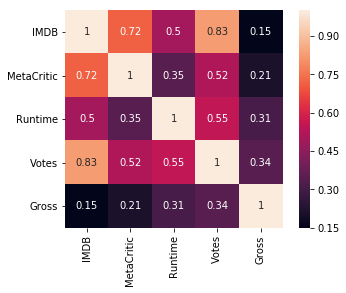

In [32]:
sns.heatmap(df.corr(),annot=True,square=True)

In [33]:
df.to_csv("IMDB_MOVIE_DATA",encoding='utf=8',index=False)